# **Flow charts in Python** - the boilerplate
#### "Even if  your salary's fit for a data wizard, remember, sooner or later, you'll find yourself as someone's Power Point jester!" - _An ancient DS Saying_

In the world of data science, where we often swim in seas of complex models and intricate pipelines, flow charts and diagrams are invaluable tools to communicate the "Aha!" moments to non-technical stakeholders. 

While Microsoft Office and its ilk have been trusted workhorses for decades, many data scientists with a bit of battle-hardened experience under their belts have discovered that they can be a real pain in the neck. Sure, they're fantastic for creating memos, spreadsheets, and presentations for the non-data-savvy world. 

Every data scientist worth their salt knows that Python isn't just for coding; it's for _**everything**_, including crafting those intricate forsaken flow charts. 

Creating a flowchart using [Matplotlib patches](https://matplotlib.org/stable/api/patches_api.html) involves plotting various shapes, arrows, and text to represent the different elements of the flowchart. Here's a step-by-step guide to creating a basic flowchart using Matplotlib. I rely on this tried-and-true template every time I tackle a presentation because, frankly, dealing with its predictable complexity is far less nerve-wracking than contending with the labyrinthine toolkit that PowerPoint's chart features can be.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

First, create a Matplotlib figure with a grid. Even though it will not show up in the chart in the end, certainly will come handy when positionening chart elements (patches) in next step. 

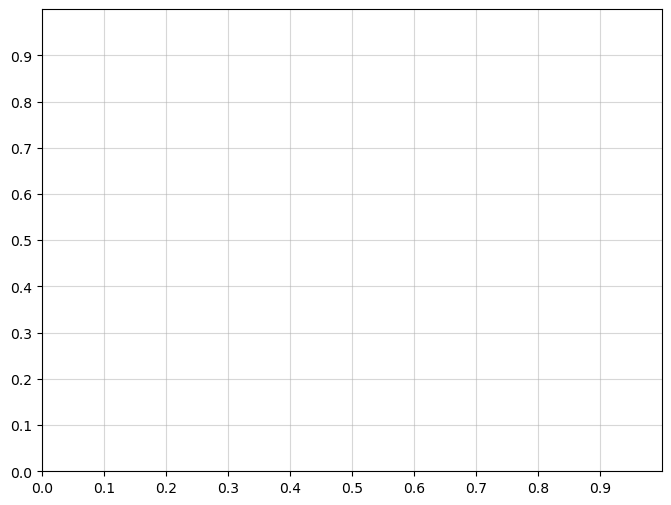

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(np.arange(0,1,0.1))
plt.yticks(np.arange(0,1,0.1))
plt.grid(alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
 
plt.show()

Determine the position of each element by specifying an origin point for it:

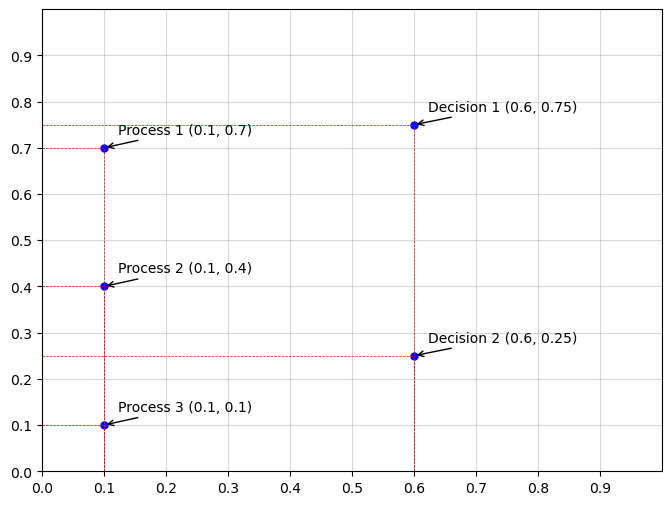

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(np.arange(0,1,0.1))
plt.yticks(np.arange(0,1,0.1))
plt.grid(alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Define the coordinates of points A, B, C, etc.
element_positions = {
    'Process 1': (0.1, 0.7),
    'Process 2': (0.1, 0.4),
    'Process 3': (0.1, 0.1),
    'Decision 1': (0.6, 0.75),
    'Decision 2': (0.6, 0.25)
}

# Plot the points and add labels
for label, (x, y) in element_positions.items():
    ax.plot(x, y, marker='o', markersize=5, label=f'{label} ({x}, {y})', c='b')

# Add annotations for each point
for label, (x, y) in element_positions.items():
    plt.annotate(f"{label} ({x}, {y})", xy=(x, y), xytext=(10, 10),
                 textcoords='offset points', fontsize=10, color='black',
                 arrowprops=dict(arrowstyle='->', color='black'))

# Add dashed lines from the axes to the points
for label, (x, y) in element_positions.items():
    ax.plot([x, x], [0, y], color='r', linestyle='--', linewidth=0.5)
    ax.plot([0, x], [y, y], color='r', linestyle='--', linewidth=0.5)


plt.show()

Matplotlib with its patches module offers a treasure trove of customization options for charts and diagrams. We can incorporate various shapes, from simple rectangles to intricate polygons, customized with [FancyBoxPatch class](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html#sphx-glr-gallery-shapes-and-collections-fancybox-demo-py). Labeling is a breeze, and you can even add URL links to labels, turning your chart into an interactive experience. The ability to layer elements, set transparency, and control line styles means your chart isn't just a static image; it's a dynamic storytelling tool.

Each chart element must be generated as an "artist," added to the figure's axis (denoted as ax), and appropriately labeled with text. For our example, we will define three distinct functions for processes, decisions, and arrows, as follows:

In [14]:
def add_process(ax, x, y, label):
    rect = patches.Rectangle((x, y), 0.3, 0.2, linewidth=3, 
                             edgecolor='#1C4E80', facecolor='#0071C5', # Intel blue
                             )
    ax.add_patch(rect)
    plt.text(x + 0.15, y + 0.1, label, fontsize=12, ha='center', va='center')

def add_decision(ax, x, y, label):
    diamond = patches.Polygon(
        [[x + 0.15, y + 0.1], 
         [x, y], 
         [x + 0.15, y - 0.1], 
         [x + 0.3, y]], 
         closed=True, 
         linewidth=3, 
         edgecolor='#1C4E80', facecolor='#76B900' # Wow Nvidia green
         )
    ax.add_patch(diamond)
    plt.text(x + 0.15, y, label, fontsize=12, ha='center', va='center')

def add_arrow(ax, x1, y1, x2, y2, scale=10, color='b'):
    arrow = patches.FancyArrowPatch((x1, y1), (x2, y2), 
                                    color='#ED1C24',  # AMD red (I hope I will not start a war with all 3 in the same chart)
                                    mutation_scale=scale
                                    )
    ax.add_patch(arrow)

Now, we'll plot elements using our functions: 

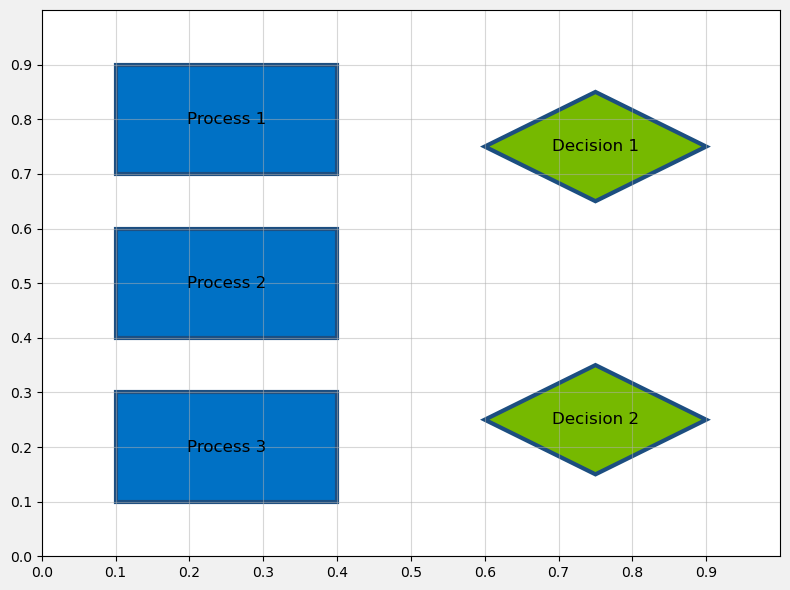

In [15]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#F1F1F1')

add_process(ax, 0.1, 0.7, 'Process 1')
add_process(ax, 0.1, 0.4, 'Process 2')
add_process(ax, 0.1, 0.1, 'Process 3')

add_decision(ax, 0.6, 0.75, 'Decision 1')
add_decision(ax, 0.6, 0.25, 'Decision 2')

plt.xticks(np.arange(0,1,0.1))
plt.yticks(np.arange(0,1,0.1))
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

dd arrows in between based on the positions of elements on the grid. That is the last bit where we needed it. Now, we can clean up the figure by removing the grid from the code.

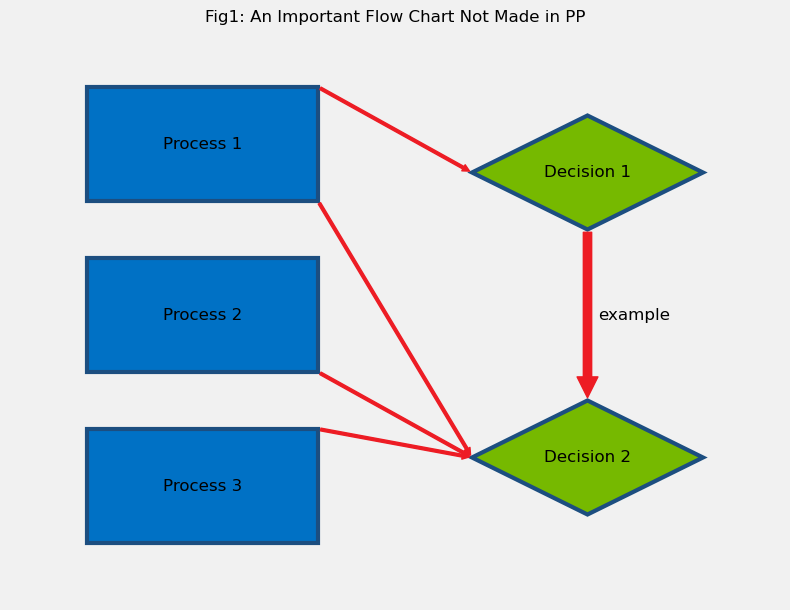

In [16]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#F1F1F1')

add_process(ax, 0.1, 0.7, 'Process 1')
add_process(ax, 0.1, 0.4, 'Process 2')
add_process(ax, 0.1, 0.1, 'Process 3')

add_decision(ax, 0.6, 0.75, 'Decision 1')
add_decision(ax, 0.6, 0.25, 'Decision 2')
add_arrow(ax, 0.75, 0.65, 0.75, 0.35, scale=30)

plt.text(0.81, 0.5, 'example', fontsize=12, 
         ha='center', va='center'
         )

add_arrow(ax, 0.4, 0.9, 0.6, 0.75)
add_arrow(ax, 0.4, 0.7, 0.6, 0.25)
add_arrow(ax, 0.4, 0.3, 0.6, 0.25)
add_arrow(ax, 0.4, 0.4, 0.6, 0.25)

ax.axis('off')  # Turn off axes
plt.tight_layout()
plt.title('Fig1: An Important Flow Chart Not Made in PP')
plt.show()

And there it is - a chart made in Python. Is it perfect? No. Complicated? Absolutely. Time-consuming? YES! But once you get the hang of it, it becomes much easier, and the main perk - it becomes infinitely customizable. You can create plots that seamlessly fit into your presentations, reuse them with just a few adjustments, and match them to your company's template colors. I've reused this boilerplate dozens of times.

Forget wrestling with PowerPoint's quirks. 
So, in the grand scheme of things, a little complexity and time investment are a small price to pay for the freedom and flexibility you gain.